In [1]:
using Plots

In [2]:
function genCCC(a,b) #implement circular correlation coefficient from Fisher & Lee (1983)
    #reference: https://cnx.org/contents/rQ-KKFjj@3/Circular-Correlation-Coefficient
    n=length(a)
    num,den1,den2=0,0,0
    for i=1:(n-1)
        for j=(i+1):n
            num+=sin(a[i]-a[j])*sin(b[i]-b[j])
            den1+=sin(a[i]-a[j])^2
            den2+=sin(b[i]-b[j])^2
        end
    end
    den=sqrt(den1*den2)
    r=num/den
    return r
end

genCCC (generic function with 1 method)

In [3]:
n=128
a=[sin(i) for i=0:pi/n:2*pi]
b=[cos(i) for i=0:pi/n:2*pi]

257-element Array{Float64,1}:
 1.0
 0.9996988186962042
 0.9987954562051724
 0.9972904566786902
 0.9951847266721969
 0.99247953459871
 0.989176509964781
 0.9852776423889412
 0.9807852804032304
 0.9757021300385286
 0.970031253194544
 0.9637760657954398
 0.9569403357322088
 ⋮
 0.9637760657954398
 0.970031253194544
 0.9757021300385285
 0.9807852804032303
 0.9852776423889411
 0.9891765099647809
 0.99247953459871
 0.9951847266721969
 0.9972904566786902
 0.9987954562051724
 0.9996988186962042
 1.0

In [4]:
r=genCCC(a,b)

-2.632839121934524e-16

In [5]:
function findBestFit(a,b)
    rList=zeros(length(a))
    counter=1
    arrangeList=[]
    reArrangement=b
    for i=1:length(a)
        test=genCCC(a,reArrangement)
        rList[i]=test
        tempArr=zeros(length(reArrangement))
        last=reArrangement[end]
        tempArr[1]=last #shift last bin in first bin
        tempArr[2:end]=reArrangement[1:(end-1)]
        reArrangement=tempArr
        push!(arrangeList,reArrangement)
    end
    maxrVal,ind=findmax(rList)
    return maxrVal,arrangeList[ind]
end

findBestFit (generic function with 1 method)

In [6]:
max_r,shifted_b=findBestFit(a,b)

(0.9999387961664965, [-1.8369701987210297e-16, 0.02454122852291202, 0.04906767432741766, 0.07356456359966698, 0.09801714032956009, 0.1224106751992156, 0.14673047445536194, 0.17096188876030133, 0.1950903220161283, 0.21910124015686974  …  -0.24298017990326412, -0.2191012401568701, -0.19509032201612866, -0.1709618887603017, -0.1467304744553623, -0.12241067519921596, -0.09801714032956045, -0.07356456359966736, -0.04906767432741803, -0.02454122852291239])

In [7]:
t=range(0,length=n*2+1,stop=2*pi)

0.0:0.02454369260617026:6.283185307179586

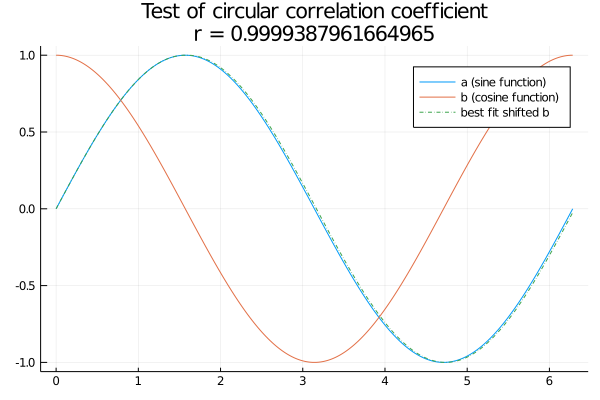

In [8]:
plot(t,a,label="a (sine function)")
plot!(t,b,label="b (cosine function)")
plot!(t,shifted_b,label="best fit shifted b",linestyle=:dashdot)
title!("Test of circular correlation coefficient\nr = $max_r")